In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def load_data():
    return pd.read_csv('cleaned_data.csv')

# 1. Bar Chart: Average Rankings by Region
def plot_avg_rankings_by_region(df):
    plt.figure(figsize=(12, 6))
    region_rankings = df.groupby('Location.1')['2024_RANK'].mean().sort_values()
    region_rankings.plot(kind='bar')
    plt.title('Average University Rankings by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Ranking')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 2. Bar Chart: Average Scores by Classification
def plot_avg_scores_by_classification(df):
    plt.figure(figsize=(12, 6))
    classification_scores = df.groupby('FOCUS')['OVERALL_SCORE'].mean().sort_values(ascending=False)
    classification_scores.plot(kind='bar')
    plt.title('Average Overall Scores by University Classification')
    plt.xlabel('Classification')
    plt.ylabel('Average Overall Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Boxplot: Ranking Distribution by Region
def plot_ranking_distribution_by_region(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Location.1', y='2024_RANK', data=df)
    plt.title('University Ranking Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Ranking')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Correlation Heatmap
def plot_correlation_heatmap(df):
    # Select numeric columns for correlation
    numeric_cols = ['AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CF_SCORE', 'IF_SCORE', 'IS_SCORE', 
                    'IRN_SCORE', 'EO_SCORE', 'S_Score', 'OVERALL_SCORE']
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of University Performance Metrics')
    plt.tight_layout()
    plt.show()

# 5. Year-over-Year Ranking Changes
def plot_ranking_changes(df):
    plt.figure(figsize=(12, 6))
    df['Ranking_Change'] = df['2023_RANK'] - df['2024_RANK']
    top_20_changes = df.nlargest(20, 'Ranking_Change')
    
    plt.bar(top_20_changes['Institution_Name'], top_20_changes['Ranking_Change'])
    plt.title('Top 20 Universities with Ranking Improvements')
    plt.xlabel('Institution')
    plt.ylabel('Ranking Improvement')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

# 6. Scatter Plot: Sustainability Score vs Overall Score
def plot_sustainability_vs_overall_score(df):
    plt.figure(figsize=(12, 6))
    plt.scatter(df['S_Score'], df['OVERALL_SCORE'], alpha=0.6)
    plt.title('Sustainability Score vs Overall University Score')
    plt.xlabel('Sustainability Score')
    plt.ylabel('Overall Score')
    plt.tight_layout()
    plt.show()

# Interactive Menu
def main_menu():
    df = load_data()
    
    while True:
        print("\n** Trends in University Performance **")
        print("1. Average Rankings by Region (Bar Chart)")
        print("2. Average Scores by Classification (Bar Chart)")
        print("3. Ranking Distribution by Region (Box Plot)")
        
        print("\n** Influential Variables **")
        print("4. Correlation Heatmap")
        print("5. Year-over-Year Ranking Changes")
        print("6. Sustainability vs Overall Score")
        
        print("\n0. Exit")
        
        #choice = input("Enter your choice (0-6): ")
        choice = '1'
        
        
        if choice == '1':
            plot_avg_rankings_by_region(df)
            break
        elif choice == '2':
            plot_avg_scores_by_classification(df)
            break
        elif choice == '3':
            plot_ranking_distribution_by_region(df)
            break
        elif choice == '4':
            plot_correlation_heatmap(df)
            break
        elif choice == '5':
            plot_ranking_changes(df)
            break
        elif choice == '6':
            plot_sustainability_vs_overall_score(df)
            break
        elif choice == '0':
            break
        else:
            print("Invalid choice. Please try again.")

# Run the interactive menu
if __name__ == '__main__':
    main_menu()

# Year over Year

C:\Users\khush\AppData\Local\Temp\ipykernel_23580\2084659691.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')


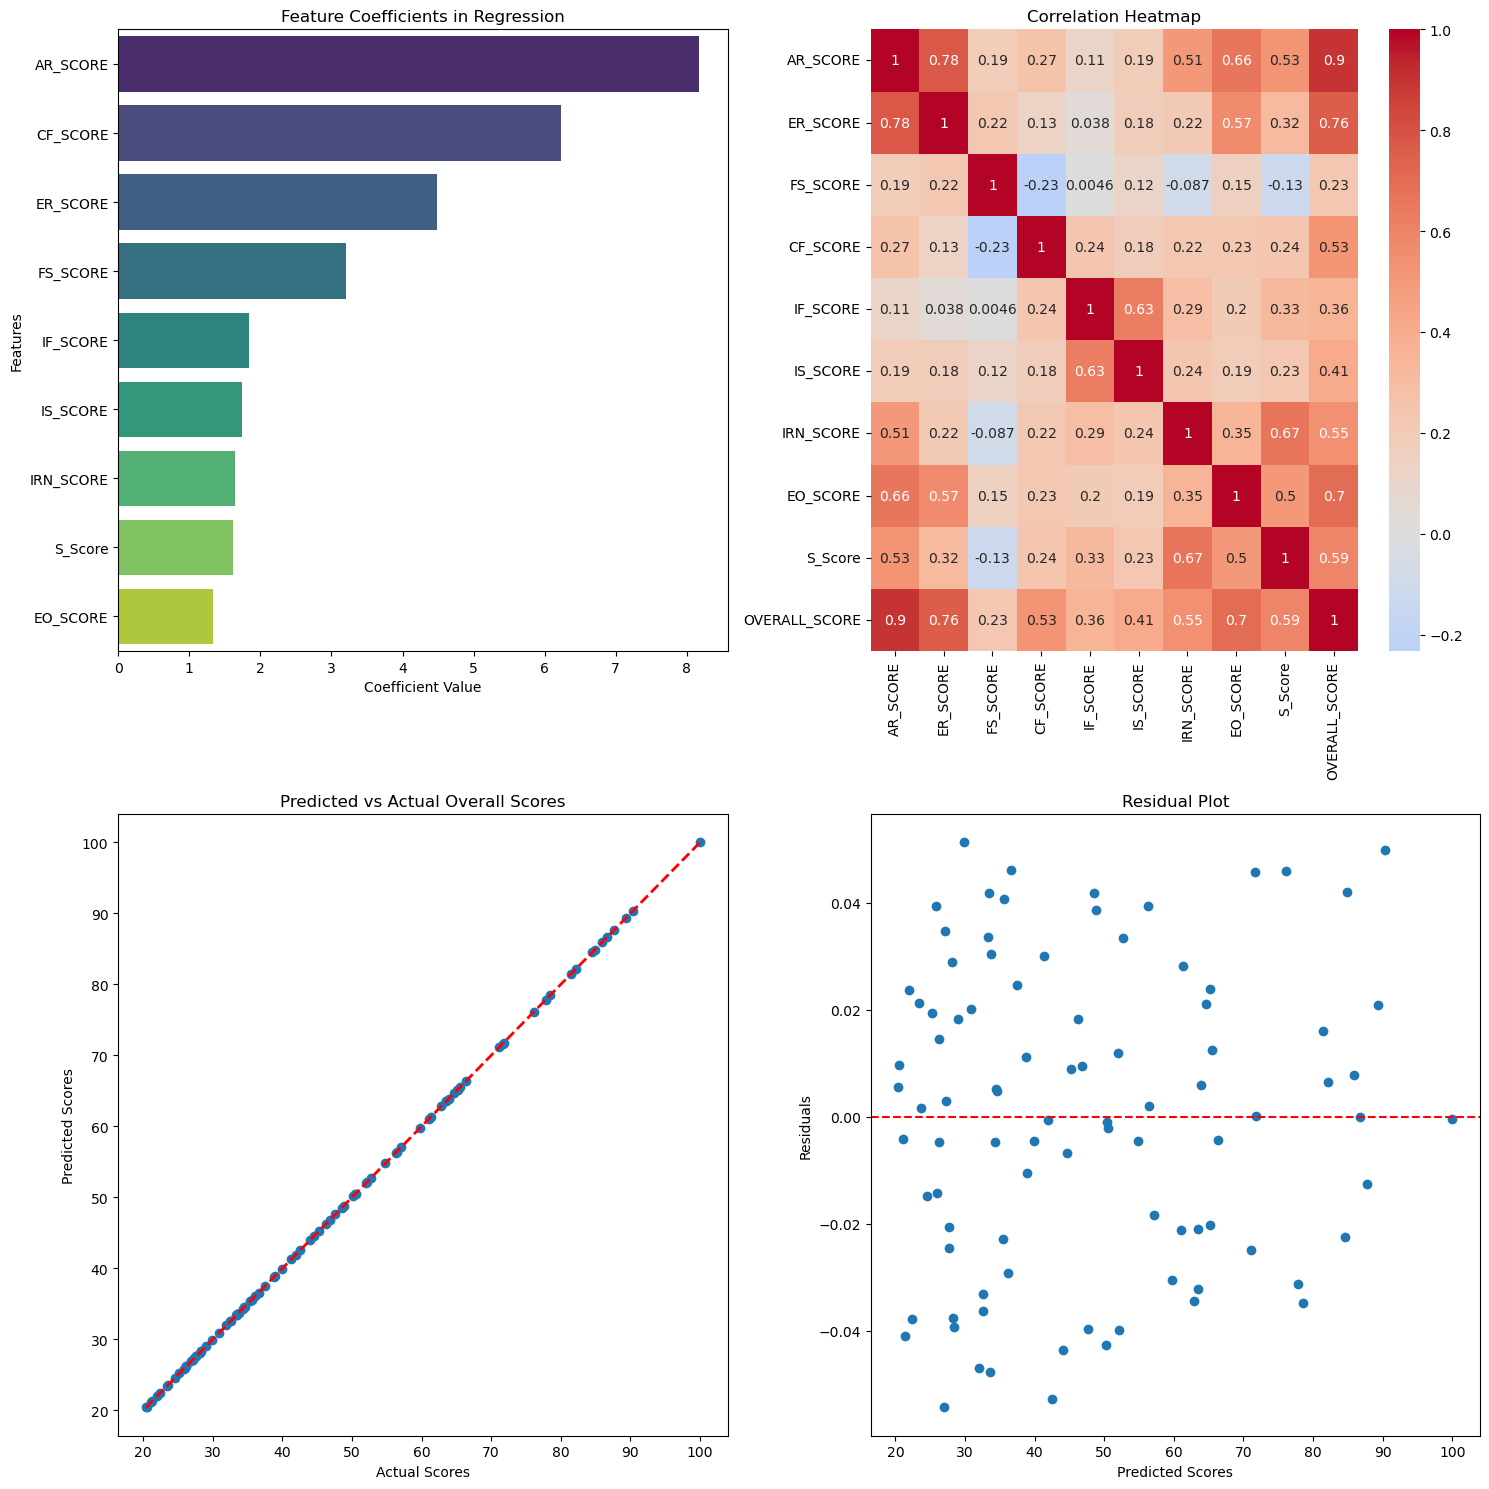

Regression Analysis Results:

R-squared: 1.0000

Feature Coefficients (Impact on Overall Score):
     Feature  Coefficient
0   AR_SCORE     8.168541
3   CF_SCORE     6.228685
1   ER_SCORE     4.484659
2   FS_SCORE     3.198902
4   IF_SCORE     1.841752
5   IS_SCORE     1.740071
6  IRN_SCORE     1.649468
8    S_Score     1.610527
7   EO_SCORE     1.331474

Correlation with Overall Score:
OVERALL_SCORE    1.000000
AR_SCORE         0.898044
ER_SCORE         0.758234
EO_SCORE         0.700007
S_Score          0.592511
IRN_SCORE        0.547334
CF_SCORE         0.529783
IS_SCORE         0.408499
IF_SCORE         0.359044
FS_SCORE         0.229113
Name: OVERALL_SCORE, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('cleaned_data.csv')

# Select relevant numeric columns for regression
numeric_columns = [
    'AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CF_SCORE', 
    'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_Score'
]

# Prepare the features (X) and target variable (y)
X = df[numeric_columns]
y = df['OVERALL_SCORE']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform linear regression
regression = LinearRegression()
regression.fit(X_train, y_train)

# Calculate R-squared
r_squared = regression.score(X_test, y_test)

# Create a dataframe of coefficients
coefficients_df = pd.DataFrame({
    'Feature': numeric_columns,
    'Coefficient': regression.coef_
})
coefficients_df = coefficients_df.sort_values('Coefficient', key=abs, ascending=False)

# Visualization setup
plt.figure(figsize=(15, 15))

# 1. Feature Importance Bar Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.title('Feature Coefficients in Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# 2. Correlation Heatmap
plt.subplot(2, 2, 2)
correlation_matrix = df[numeric_columns + ['OVERALL_SCORE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# 3. Scatter plot of Predicted vs Actual Scores
plt.subplot(2, 2, 3)
y_pred = regression.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Overall Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# 4. Residual Plot
plt.subplot(2, 2, 4)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Print textual results
print("Regression Analysis Results:")
print(f"\nR-squared: {r_squared:.4f}")
print("\nFeature Coefficients (Impact on Overall Score):")
print(coefficients_df)

print("\nCorrelation with Overall Score:")
print(correlation_matrix['OVERALL_SCORE'].sort_values(ascending=False))

# Line Charts: Plot the rankings or scores for each university across the years 2023 and 2024 to visualize changes.
# Bar Charts: Compare the average rankings and scores for 2023 and 2024 for specific regions or classifications.

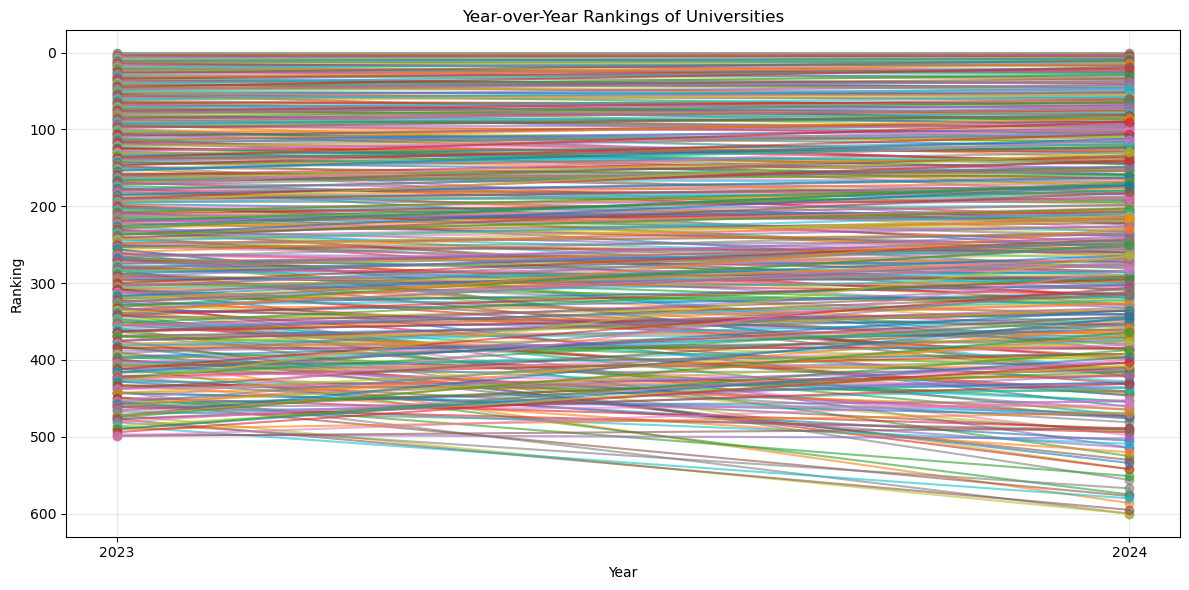

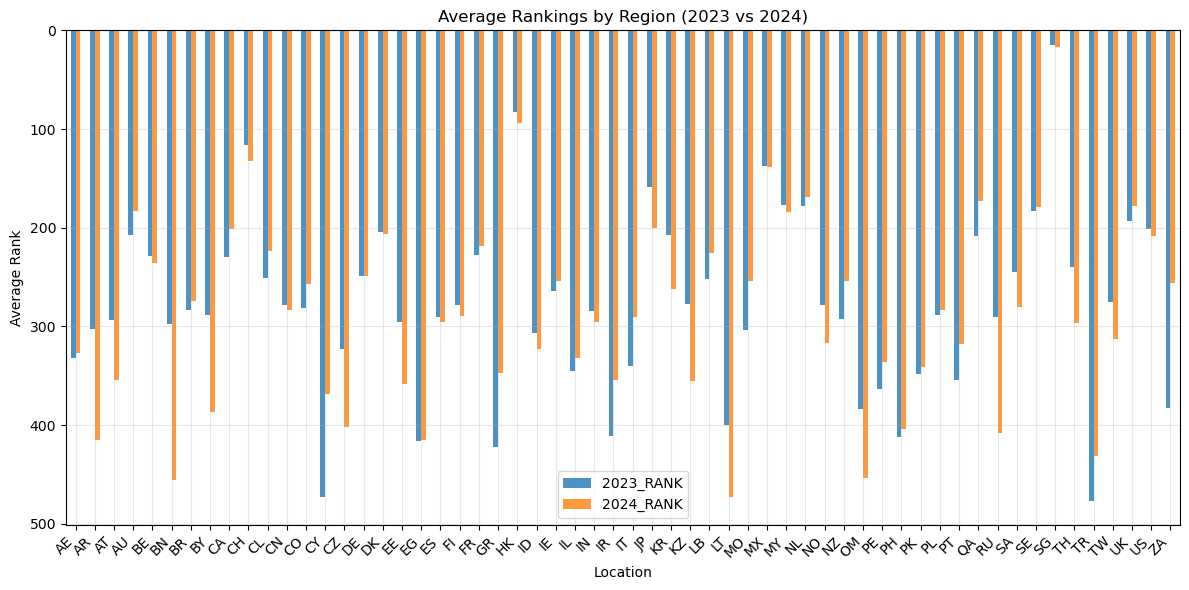

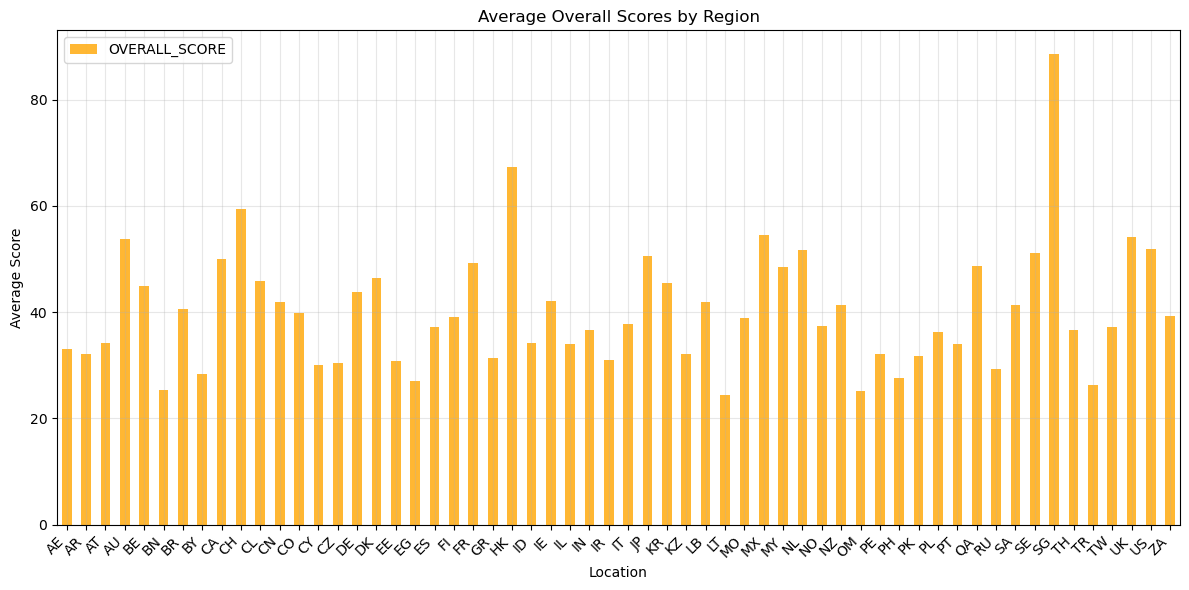

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Convert ranking columns to integers
data['2023_RANK'] = data['2023_RANK'].astype(int)
data['2024_RANK'] = data['2024_RANK'].astype(int)

# Line Chart for Rankings
def plot_line_chart(data):
    data_sorted = data.sort_values(by='2023_RANK')
    plt.figure(figsize=(12, 6))

    for index, row in data_sorted.iterrows():
        plt.plot(['2023', '2024'], [row['2023_RANK'], row['2024_RANK']], marker='o', alpha=0.6)

    plt.title('Year-over-Year Rankings of Universities')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.gca().invert_yaxis()  # Invert y-axis since lower ranks are better
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Bar Charts for Average Rankings and Scores
def plot_bar_charts(data):
    # Group by Region and compute averages
    region_avg = data.groupby('Location')[['2023_RANK', '2024_RANK', 'OVERALL_SCORE']].mean()

    # Bar Chart for Average Rankings
    region_avg[['2023_RANK', '2024_RANK']].plot(kind='bar', figsize=(12, 6), alpha=0.8)
    plt.title('Average Rankings by Region (2023 vs 2024)')
    plt.ylabel('Average Rank')
    plt.gca().invert_yaxis()
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Bar Chart for Average Overall Scores
    region_avg[['OVERALL_SCORE']].plot(kind='bar', figsize=(12, 6), color='orange', alpha=0.8)
    plt.title('Average Overall Scores by Region')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Generate the charts
plot_line_chart(data)
plot_bar_charts(data)


# Pie Chart  for University Classification Breakdown

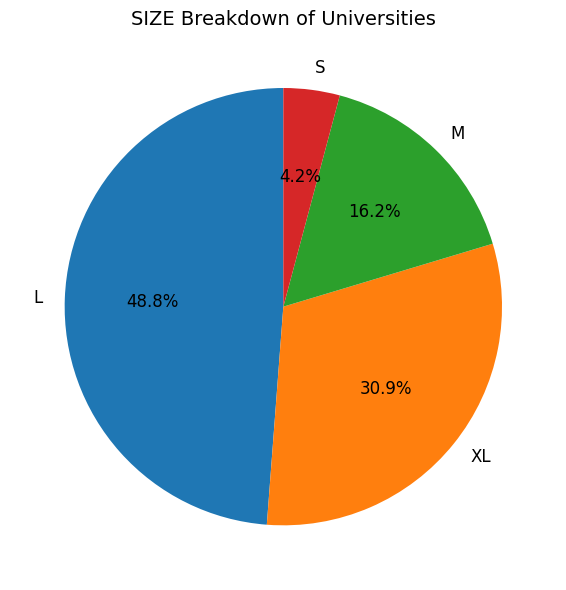

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Pie Chart for Classification Breakdown
def plot_pie_chart(data, column_name):
    classification_counts = data[column_name].value_counts()
    plt.figure(figsize=(6, 6))
    classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
    plt.title(f'{column_name} Breakdown of Universities', fontsize=14)
    plt.ylabel('')  # Remove y-axis label for a cleaner look
    plt.tight_layout()
    plt.show()

# Replace 'COLUMN_NAME' with the desired column for breakdown (e.g., 'SIZE', 'FOCUS', or 'STATUS')
plot_pie_chart(data, column_name='SIZE')  # Example for SIZE


# Heatmap for regional an international metrics

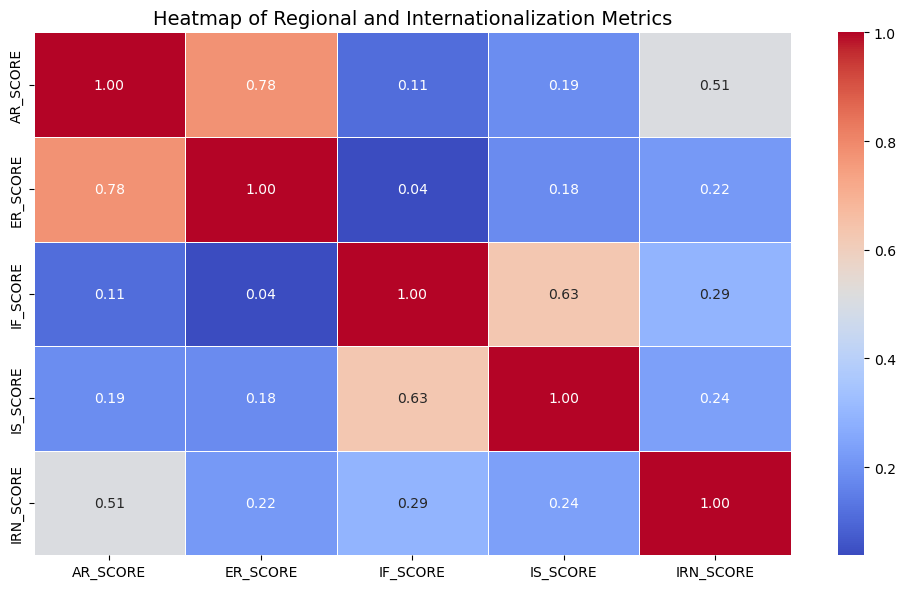

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Heatmap for Regional and Internationalization Metrics
def plot_heatmap(data):
    # Select relevant columns for heatmap
    heatmap_data = data[['AR_SCORE', 'ER_SCORE', 'IF_SCORE', 'IS_SCORE', 'IRN_SCORE']]
    
    # Compute correlation matrix
    correlation_matrix = heatmap_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title('Heatmap of Regional and Internationalization Metrics', fontsize=14)
    plt.tight_layout()
    plt.show()

# Generate the heatmap
plot_heatmap(data)


# Scatter plot for variable relationships (e.g., sustainability vs. rankings).

C:\Users\khush\AppData\Local\Temp\ipykernel_9636\1529880352.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


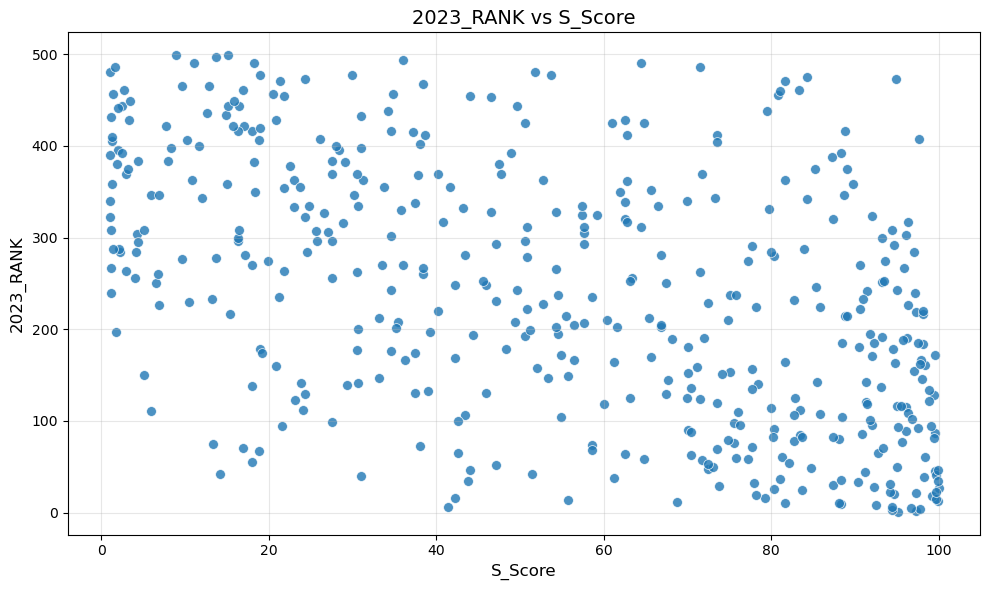

C:\Users\khush\AppData\Local\Temp\ipykernel_9636\1529880352.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


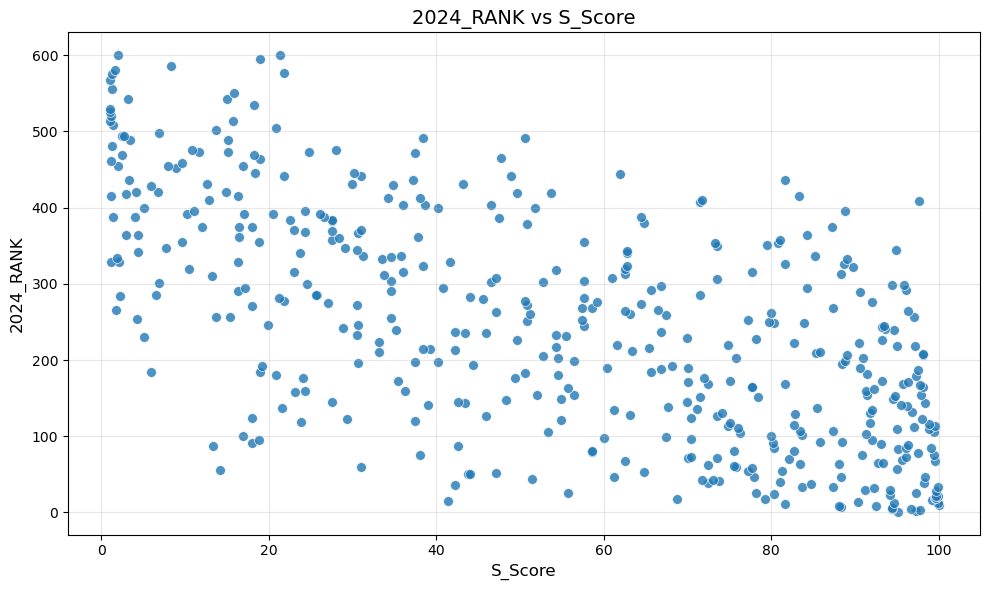

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Scatter Plot for Variable Relationships
def plot_scatter(data, x_column, y_column, hue=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=data,
        x=x_column,
        y=y_column,
        hue=hue,
        palette='viridis',
        s=50,  # Marker size
        alpha=0.8
    )
    plt.title(f'{y_column} vs {x_column}', fontsize=14)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    if hue:
        plt.legend(title=hue)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example: Sustainability Score vs Rankings for 2023
plot_scatter(data, x_column='S_Score', y_column='2023_RANK')

# Example: Sustainability Score vs Rankings for 2024
plot_scatter(data, x_column='S_Score', y_column='2024_RANK')


# feature importance bar chart

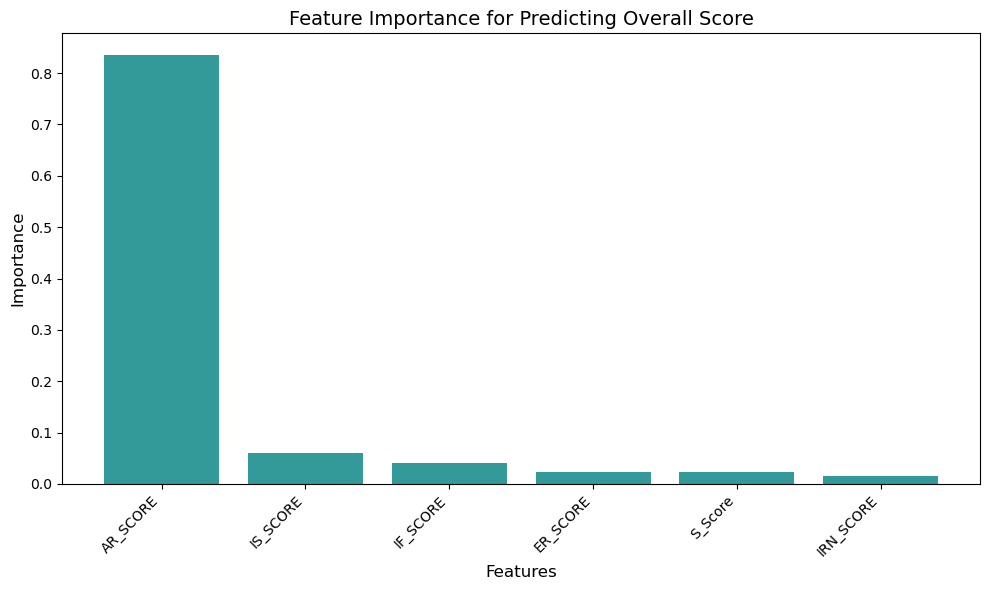

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Prepare the data for modeling
def prepare_data(data):
    # Select features and target variable
    features = ['AR_SCORE', 'ER_SCORE', 'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'S_Score']
    target = 'OVERALL_SCORE'
    
    X = data[features]
    y = data[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, features

# Train a Random Forest model and get feature importances
def feature_importance_chart(data):
    X_train, X_test, y_train, y_test, features = prepare_data(data)
    
    # Train a Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal', alpha=0.8)
    plt.title('Feature Importance for Predicting Overall Score', fontsize=14)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Importance', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Generate the feature importance chart
feature_importance_chart(data)


# Clustering

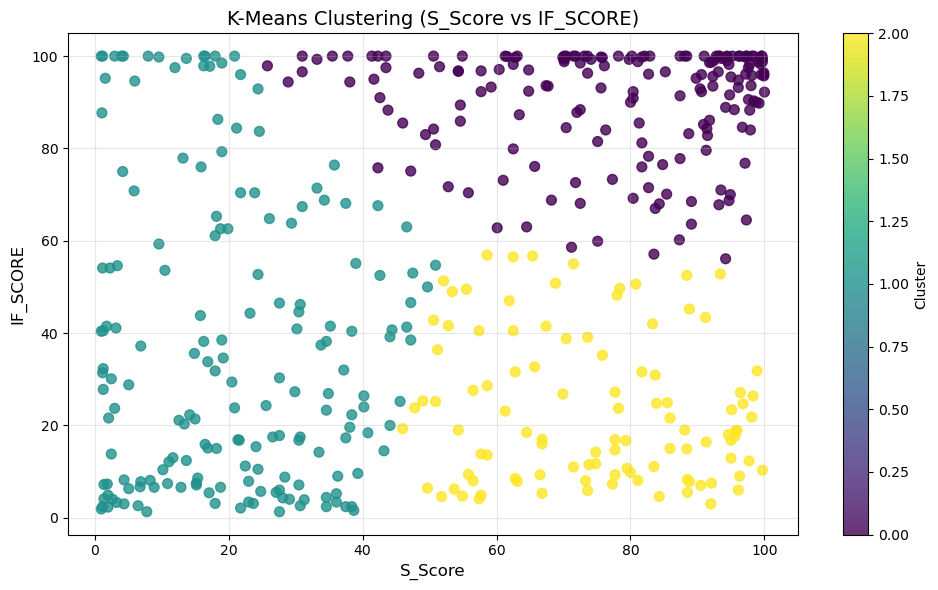

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = "cleaned_data.csv"
data = pd.read_csv(file_path)

# Perform K-Means Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Extract the selected features
    clustering_data = data[features].dropna()
    
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(clustering_data)
    
    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(standardized_data)
    
    # Add cluster labels to the data
    clustering_data['Cluster'] = labels
    data.loc[clustering_data.index, 'Cluster'] = labels  # Update original data with cluster labels
    
    # Visualize Clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        clustering_data[features[0]],
        clustering_data[features[1]],
        c=clustering_data['Cluster'],
        cmap='viridis',
        s=50,
        alpha=0.8
    )
    plt.colorbar(scatter, label='Cluster')
    plt.title(f'K-Means Clustering ({features[0]} vs {features[1]})', fontsize=14)
    plt.xlabel(features[0], fontsize=12)
    plt.ylabel(features[1], fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return data

# Select features for clustering and specify the number of clusters
features = ['S_Score', 'IF_SCORE']
n_clusters = 3  # Number of clusters to group universities
data = kmeans_clustering(data, features, n_clusters=n_clusters)
